In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
from wordcloud import WordCloud

In [56]:
df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [57]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [58]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [60]:
df.shape

(51717, 17)

In [61]:
df.drop_duplicates(inplace = True)

In [62]:
df['rate'].isnull().sum()

7775

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [64]:
df.dropna(inplace = True)
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [65]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [66]:
df.rename(columns={'approx_cost(for two people)':'Cost2Plates','listed_in(type)':'Type'},inplace=True)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost2Plates,reviews_list,menu_item,Type,listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [67]:
df=df.drop(['listed_in(city)'], axis=1)

In [68]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [69]:
df['Cost2Plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [70]:
def handlecomma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)

df['Cost2Plates']=df['Cost2Plates'].apply(handlecomma)
df['Cost2Plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [71]:
df['rest_type'].value_counts()

rest_type
Casual Dining                7349
Quick Bites                  5240
Cafe                         2325
Dessert Parlor               1076
Casual Dining, Bar            984
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

In [72]:
rest_type=df['rest_type'].value_counts()
rest_type

rest_type
Casual Dining                7349
Quick Bites                  5240
Cafe                         2325
Dessert Parlor               1076
Casual Dining, Bar            984
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

In [73]:
rest_type_lessthan400 = rest_type[rest_type<400]
rest_type_lessthan400

rest_type
Bar                          357
Bar, Casual Dining           343
Takeaway, Delivery           343
Pub                          326
Lounge                       313
                            ... 
Fine Dining, Microbrewery      5
Club, Casual Dining            4
Dessert Parlor, Kiosk          2
Dhaba                          1
Food Court, Casual Dining      1
Name: count, Length: 67, dtype: int64

In [74]:
def handleresttype(value):
    if value in rest_type_lessthan400:
        return 'Others'
    else:
        return value

df['rest_type']=df['rest_type'].apply(handleresttype)
df['rest_type'].value_counts()


rest_type
Casual Dining         7349
Others                5549
Quick Bites           5240
Cafe                  2325
Dessert Parlor        1076
Casual Dining, Bar     984
Delivery               670
Name: count, dtype: int64

In [75]:
df['location'].value_counts()

location
Koramangala 5th Block    1783
BTM                      1456
Indiranagar              1350
HSR                      1162
Jayanagar                1037
                         ... 
Yelahanka                   2
Kanakapura Road             2
West Bangalore              2
Rajarajeshwari Nagar        2
KR Puram                    1
Name: count, Length: 88, dtype: int64

In [76]:
location=df['location'].value_counts()
location_lessthan_100=location[location<100]
location_lessthan_100

location
Infantry Road                    95
Race Course Road                 75
Basaveshwara Nagar               71
Seshadripuram                    69
Shivajinagar                     69
Nagawara                         62
Ejipura                          59
Kumaraswamy Layout               56
Kaggadasapura                    48
Koramangala 2nd Block            45
Thippasandra                     43
ITPL Main Road, Whitefield       42
HBR Layout                       42
Wilson Garden                    41
Sadashiv Nagar                   38
Hennur                           34
Bommanahalli                     28
Majestic                         27
Varthur Main Road, Whitefield    27
Hosur Road                       24
Yeshwantpur                      24
Langford Town                    22
RT Nagar                         22
Sahakara Nagar                   20
South Bangalore                  19
Sankey Road                      17
Sanjay Nagar                     17
Koramangala        

In [77]:
def handle_location(value):
    if value in location_lessthan_100:
        return 'others'
    else:
        return value

df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

location
Koramangala 5th Block    1783
BTM                      1456
Indiranagar              1350
others                   1254
HSR                      1162
Jayanagar                1037
JP Nagar                 1016
Whitefield                824
Koramangala 7th Block     725
Koramangala 6th Block     720
Marathahalli              683
Koramangala 4th Block     644
MG Road                   596
Brigade Road              570
Church Street             508
Bannerghatta Road         496
Ulsoor                    477
Kalyan Nagar              467
Koramangala 1st Block     466
Bellandur                 462
Sarjapur Road             456
Lavelle Road              445
Residency Road            442
Banashankari              387
Malleshwaram              366
Richmond Road             351
Cunningham Road           333
Electronic City           327
Brookefield               307
St. Marks Road            304
New BEL Road              303
Frazer Town               293
Basavanagudi              286
K

In [78]:
cuisines=df['cuisines'].value_counts()
cuisines_lessthan_100=cuisines[cuisines<100]
cuisines_lessthan_100

cuisines
Biryani, North Indian                                         97
North Indian, Street Food                                     94
Biryani, North Indian, Chinese                                94
Cafe, Desserts                                                85
Pizza, Cafe, Italian                                          85
                                                              ..
Cafe, Salad, Healthy Food, Mexican                             1
Biryani, Chettinad, Chinese                                    1
North Indian, South Indian, Chinese, Desserts, Street Food     1
North Indian, Chinese, South Indian, Juices                    1
Thai, Chinese, Momos                                           1
Name: count, Length: 1664, dtype: int64

In [79]:
def handlecuisine(value):
    if value in cuisines_lessthan_100:
        return 'others'
    else:
        return value
    
df['cuisines']=df['cuisines'].apply(handlecuisine)
df['cuisines'].value_counts()

cuisines
others                                              17606
North Indian                                         1144
North Indian, Chinese                                 777
South Indian                                          359
Cafe                                                  273
South Indian, North Indian, Chinese                   233
Bakery, Desserts                                      215
Desserts, Beverages                                   214
Chinese                                               210
Ice Cream, Desserts                                   208
Desserts                                              206
Biryani                                               169
Chinese, Momos                                        162
Finger Food                                           151
Fast Food                                             150
North Indian, Chinese, Biryani                        139
Mithai, Street Food                                   138
North

In [80]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost2Plates,reviews_list,menu_item,Type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",others,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,Others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,others,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


Edit rating column. Rating e.g. "4.5/5" ----> to be converted to only '4.5'

In [81]:
df['rate'] = df['rate'].str.split('/', expand=True)[0]


One of the rating values in rate_column is "NEW" (str dtype), so replace with '0' for future mathematical operations.

In [82]:
def handlerate(value):
    #value=str(value)
    if value == 'NEW':
        value=value.replace('NEW','0')
        return float(value)
    else:
        return float(value)

df['rate']=df['rate'].apply(handlerate)
df['rate'].value_counts()

rate
3.9    3238
4.0    2860
4.1    2786
3.8    2473
4.2    2097
4.3    1671
3.7    1639
4.4    1123
3.6     875
4.5     630
3.5     482
3.4     351
2.8     315
2.9     309
3.1     307
4.6     294
3.0     291
3.2     249
3.3     218
2.7     190
4.7     167
0.0     147
2.6     138
4.8      66
2.5      57
4.9      55
2.4      54
2.3      45
2.2      26
2.1      24
2.0      11
1.8       5
Name: count, dtype: int64

# Data is all clean! EDA Done! Lets jump to Visualization of the data.

In [83]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost2Plates,reviews_list,menu_item,Type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",others,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,Others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,others,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


# 1) Count plot of Locations of Restaurants

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Bannerghatta Road'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Koramangala 5th Block'),
  Text(8, 0, 'Shanti Nagar'),
  Text(9, 0, 'Richmond Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Sarjapur Road'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'HSR'),
  Text(14, 0, 'Old Airport Road'),
  Text(15, 0, 'Indiranagar'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'MG Road'),
  Text(18, 0, 'Brigade Road'),
  Text(19, 0, 'Lavelle Road'),
  Text(20, 0, 'Church Street'),
  Text(21, 0, 'Ulsoor'),
  Text(22, 0, 'Residency Road'),
  Text(23, 0, 'St. Marks Road'),
  Text(24, 0, 'Cunningham Road'),
  Text(25, 0, 'Domlur'),
  Text(26, 0, 'Ko

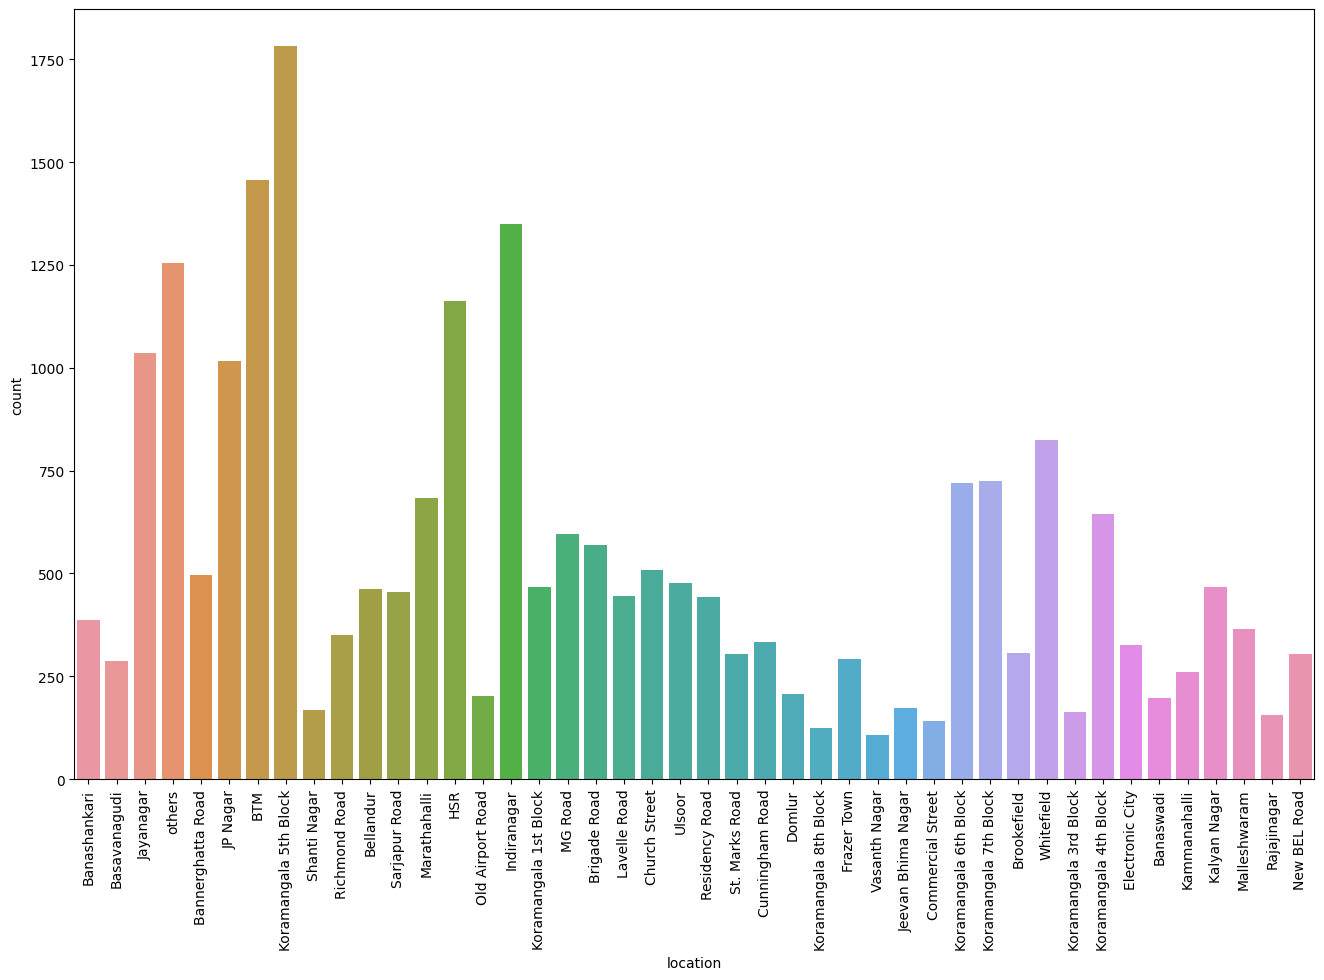

In [84]:
plt.figure(figsize=(16,10))
sns.countplot(x =df['location'], data = df)
plt.xticks(rotation=90)

Analysis:
Avoid opening new restaurants for business in areas like Koramangla, BTM, Indirananagar, Jayanagar, etc where already a large number of resturants prevalent. Instead focus on localities where fewer restaurants are there like Commercial street or Vasant nagar, etc considering other factors as well.

# 2) Visualizing Online order services

<Axes: xlabel='online_order', ylabel='count'>

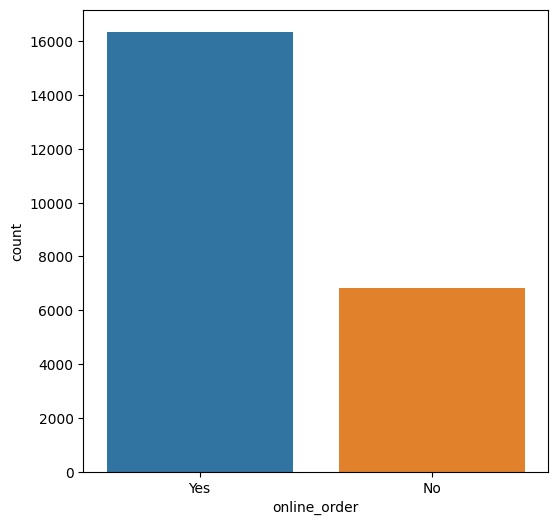

In [85]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['online_order'],data=df)

Analysis: 
Most of the restaurants ~ more than 17-18000 have the online order facility. So to open a new restaurant, one should provide online delivery/order services for the restaurant to flourish.

# 3) Visualize book table facility amoung restaurants

<Axes: xlabel='book_table', ylabel='count'>

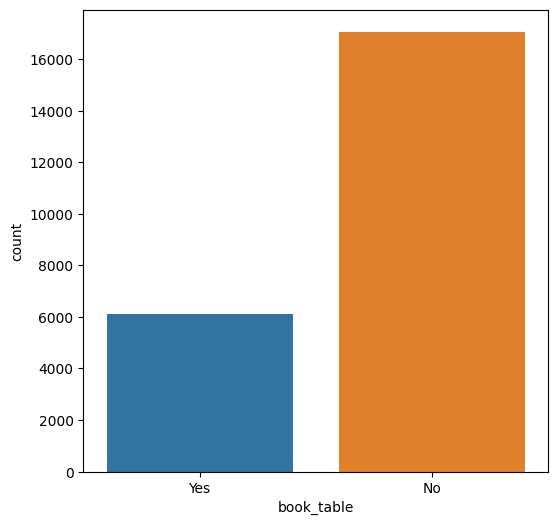

In [86]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['book_table'],data=df)

Analysis:
Majority of restaurants do not provide BookTable-Dine-in Facility. For a better success at business the newly open restaurants should provide Book table facility.

# 4) Visualize Online ordering facility Vs the Rating given to the restaurnt

<Axes: xlabel='online_order', ylabel='rate'>

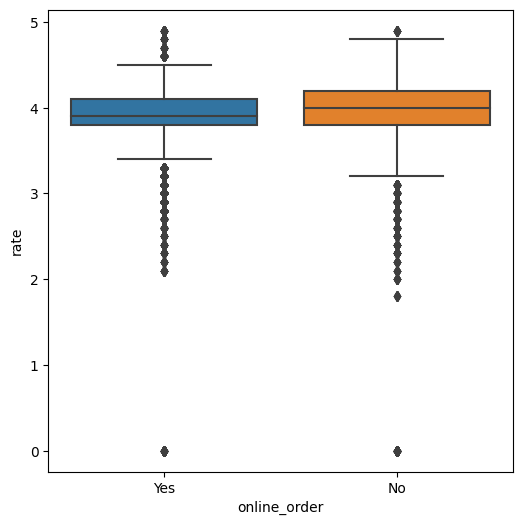

In [87]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['online_order'],y=df['rate'],data=df)

Analysis: 
More or less the mean rating is 4 irrespective of whether Online ordering services provided or not.

# 5) Book Table V/s Rating

<Axes: xlabel='book_table', ylabel='rate'>

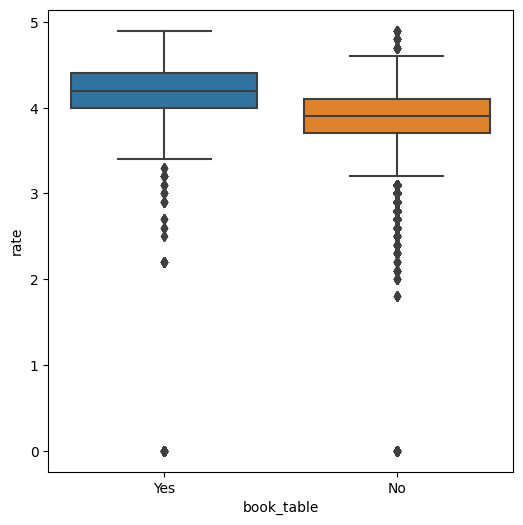

In [88]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['book_table'],y=df['rate'],data=df)

analysis:
restaurants that offer book table facility have average rating more than the restaurants that do not provide the facility. Further, maximum rating goes upto 4.9 for restaurants withthe said facility.

# 6) Check Location wise online order facility.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Bannerghatta Road'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Koramangala 5th Block'),
  Text(8, 0, 'Shanti Nagar'),
  Text(9, 0, 'Richmond Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Sarjapur Road'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'HSR'),
  Text(14, 0, 'Old Airport Road'),
  Text(15, 0, 'Indiranagar'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'MG Road'),
  Text(18, 0, 'Brigade Road'),
  Text(19, 0, 'Lavelle Road'),
  Text(20, 0, 'Church Street'),
  Text(21, 0, 'Ulsoor'),
  Text(22, 0, 'Residency Road'),
  Text(23, 0, 'St. Marks Road'),
  Text(24, 0, 'Cunningham Road'),
  Text(25, 0, 'Domlur'),
  Text(26, 0, 'Ko

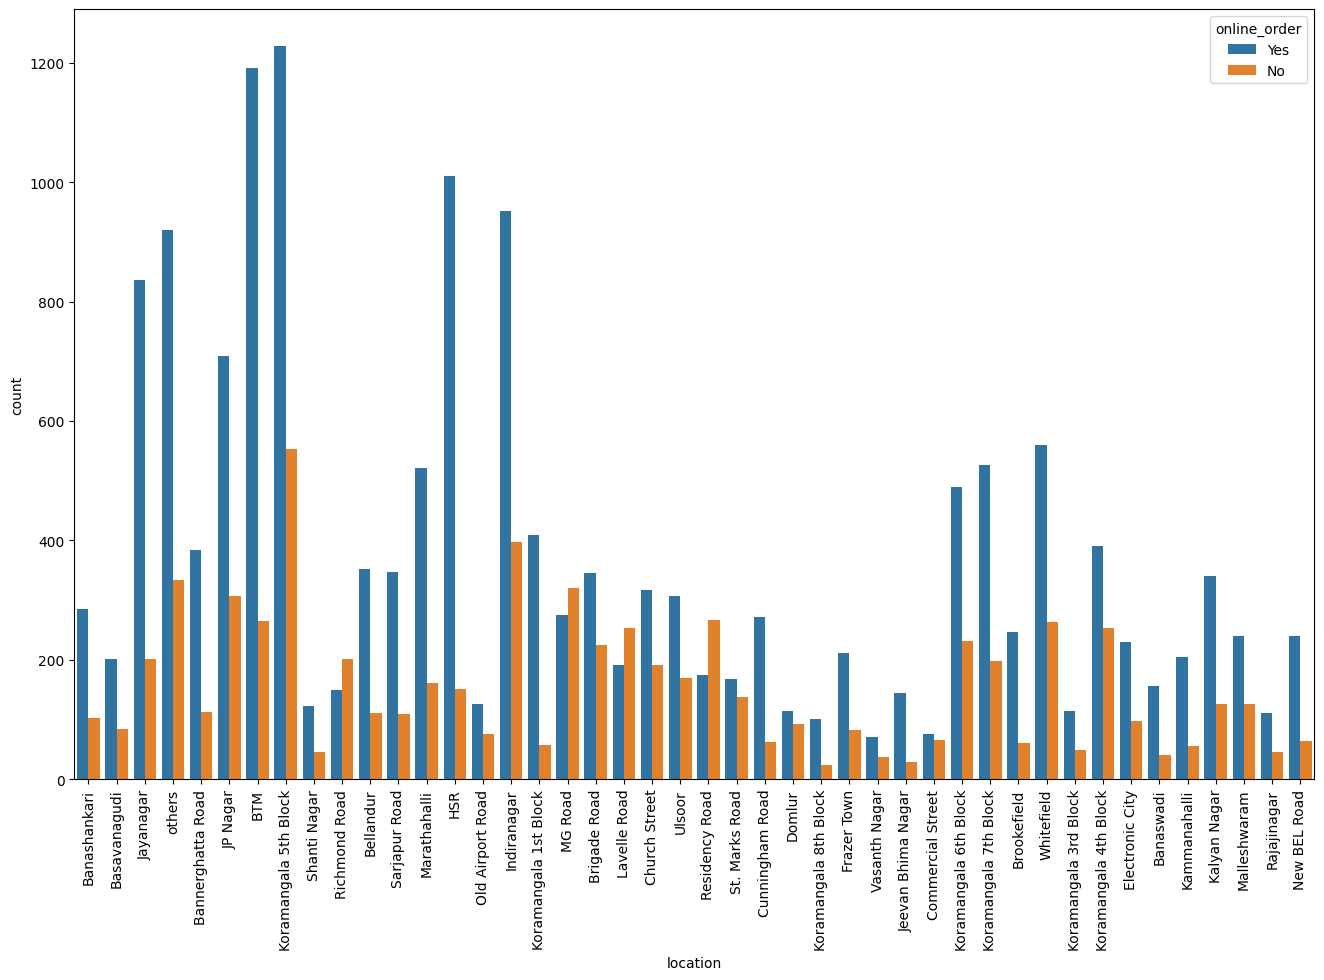

In [89]:
plt.figure(figsize=(16,10))
sns.countplot(x =df['location'],hue=df['online_order'],data = df)
plt.xticks(rotation=90)

# Solving using Grouby and Pivot tables

In [90]:
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online_order.csv')
df2=pd.read_csv('location_online_order.csv')
df2

,location,online_order,name
0,BTM,No,265
1,BTM,Yes,1191
2,Banashankari,No,102
3,Banashankari,Yes,285
4,Banaswadi,No,40
...,...,...,...
83,Vasanth Nagar,Yes,71
84,Whitefield,No,264
85,Whitefield,Yes,560
86,others,No,334


In [91]:
df2=df2.pivot_table(df2, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)

/tmp/ipykernel_33/238102539.py:1: FutureWarning: The provided callable <function sum at 0x7e847c11b010> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2=df2.pivot_table(df2, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)


<Axes: xlabel='location'>

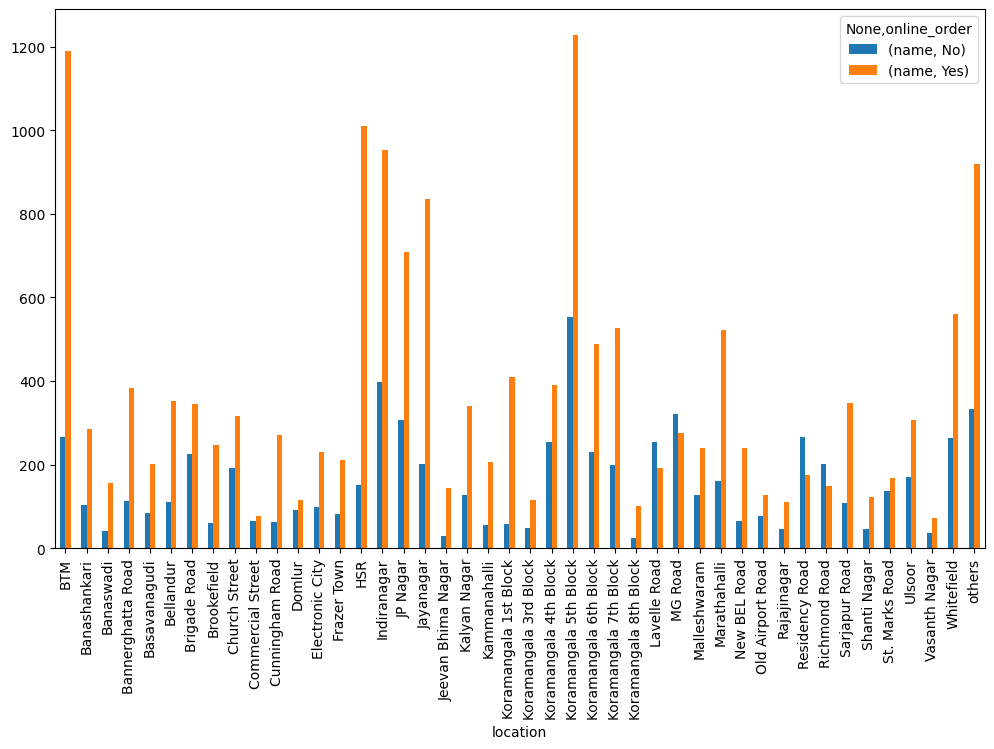

In [92]:
df2.plot(kind='bar',figsize=(12,7))

Analysis:
As seen earlier, places like Kormangla 5th Block, HSR, Indiranagar, Jayanagar, BTM which are populated with restaurants, majority of the restaurants provide online ordering facility.
However, in areas like Lavalle Road,MG Road, Residency Road, Richmond Road which have fewer restaurants, the online order delivery options are lesser. So there can be scope of improvement in theses ares by increasing order delivery and also good oppurtunities for new startups providing online order facility.

# 7) Location wise book table facility

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Bannerghatta Road'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Koramangala 5th Block'),
  Text(8, 0, 'Shanti Nagar'),
  Text(9, 0, 'Richmond Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Sarjapur Road'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'HSR'),
  Text(14, 0, 'Old Airport Road'),
  Text(15, 0, 'Indiranagar'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'MG Road'),
  Text(18, 0, 'Brigade Road'),
  Text(19, 0, 'Lavelle Road'),
  Text(20, 0, 'Church Street'),
  Text(21, 0, 'Ulsoor'),
  Text(22, 0, 'Residency Road'),
  Text(23, 0, 'St. Marks Road'),
  Text(24, 0, 'Cunningham Road'),
  Text(25, 0, 'Domlur'),
  Text(26, 0, 'Ko

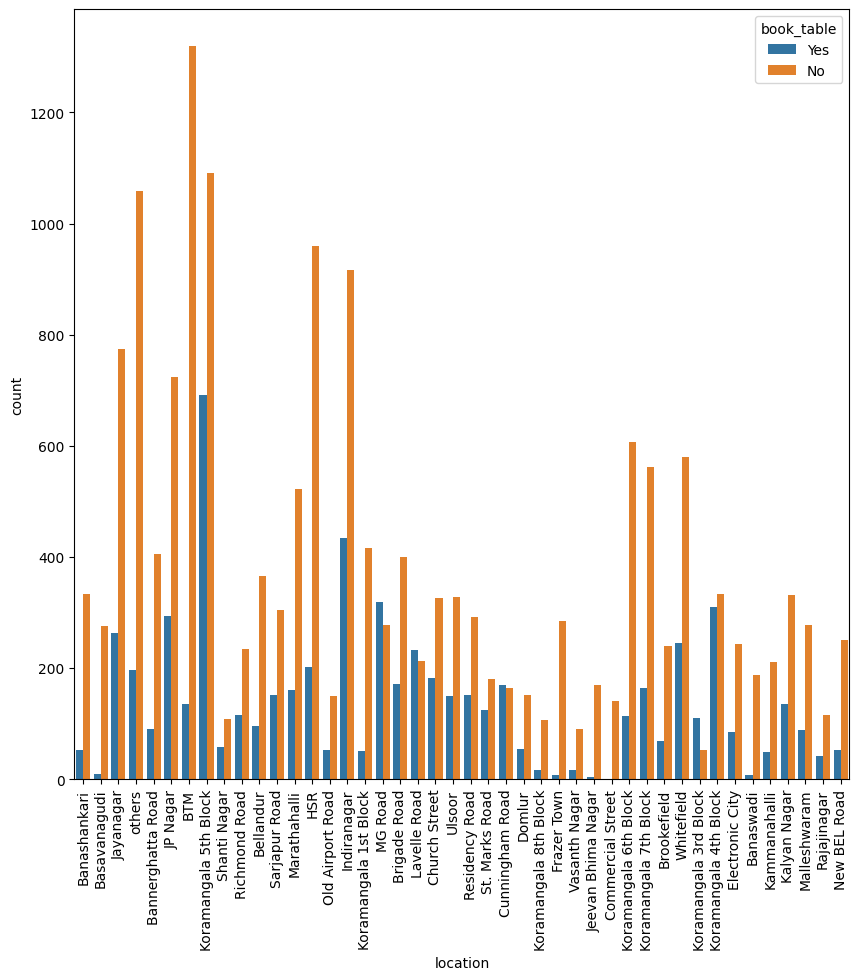

In [93]:
plt.figure(figsize=(10,10))
sns.countplot(x =df['location'],hue=df['book_table'],data = df)
plt.xticks(rotation=90)

Analysis:
Some powerful insights revealed through this plot!
Majority of Location do not have restaurants providing BOOK-TABLE facility, even in areas like BTM, Indiranagar or Kormangla with high restaurant counts. Major scope of improvement in these localities to levelup the revenue through dine-in. For new chains and startups one can target areas with no Book table facility and less populated with restaurants, to avoid other market competitors. Commercial street, Vasant nagar, Shanti nagar, Old airport road would be a few recommendations for market expansion.

# 8) Visualizing type of restaurants V/s Rating

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Casual Dining'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'Quick Bites'),
  Text(3, 0, 'Cafe'),
  Text(4, 0, 'Delivery'),
  Text(5, 0, 'Dessert Parlor'),
  Text(6, 0, 'Casual Dining, Bar')])

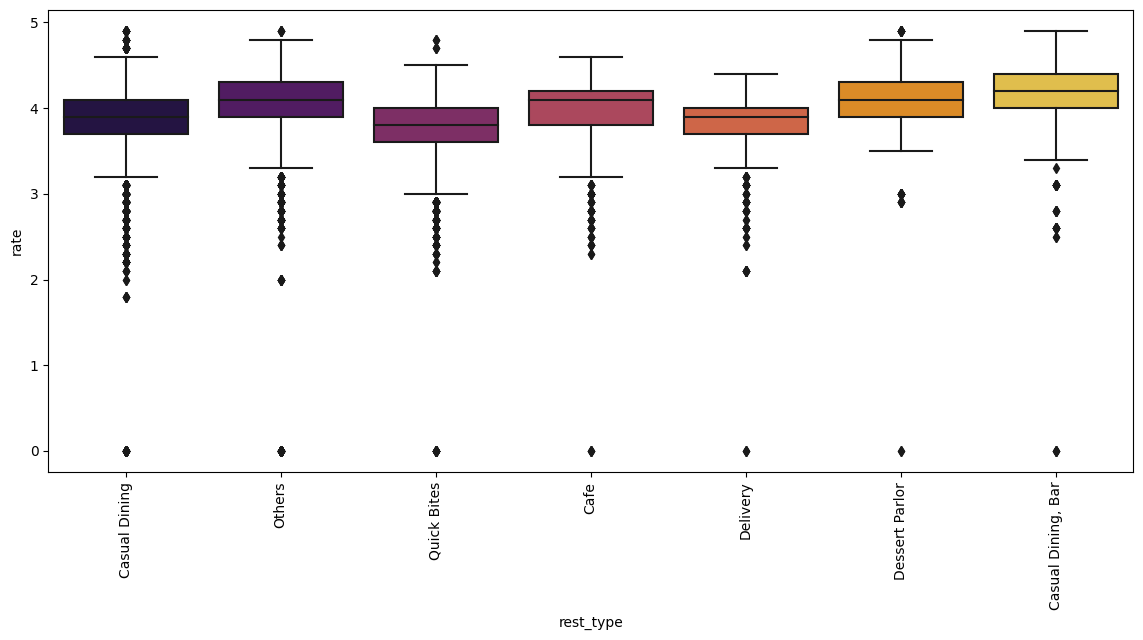

In [94]:
df['rest_type'].value_counts()
plt.figure(figsize=(14,6))
sns.boxplot(x=df['rest_type'],y=df['rate'],data=df,palette='inferno')
plt.xticks(rotation=90)

Analysis:
Mamximum average rating given by customers is for Casual Dining, Fine Dining, Bars and Loung. Followed by that Cafes and Dessert shops are favoured over Quick bites and Delivery/Takeaways.

# 9) Location - wise restaurant type distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Bannerghatta Road'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Koramangala 5th Block'),
  Text(8, 0, 'Shanti Nagar'),
  Text(9, 0, 'Richmond Road'),
  Text(10, 0, 'Bellandur'),
  Text(11, 0, 'Sarjapur Road'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'HSR'),
  Text(14, 0, 'Old Airport Road'),
  Text(15, 0, 'Indiranagar'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'MG Road'),
  Text(18, 0, 'Brigade Road'),
  Text(19, 0, 'Lavelle Road'),
  Text(20, 0, 'Church Street'),
  Text(21, 0, 'Ulsoor'),
  Text(22, 0, 'Residency Road'),
  Text(23, 0, 'St. Marks Road'),
  Text(24, 0, 'Cunningham Road'),
  Text(25, 0, 'Domlur'),
  Text(26, 0, 'Ko

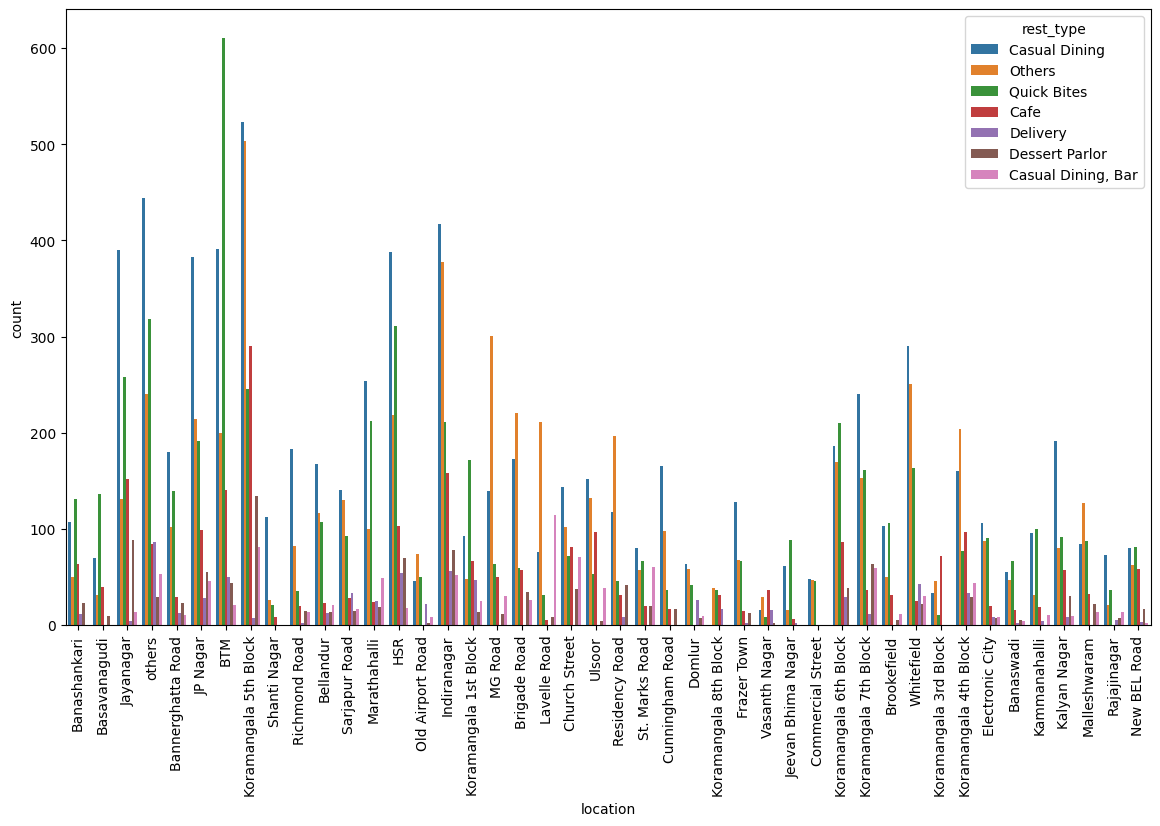

In [95]:
plt.figure(figsize=(14,8))
sns.countplot(x =df['location'],hue=df['rest_type'],data = df)
plt.xticks(rotation=90)

Through groupby and Pivot tables functions

In [96]:
df3=df.groupby(['location','rest_type'])['name'].count()
df3.to_csv('location_rest_type.csv')
df4=pd.read_csv('location_rest_type.csv')
df4=df4.pivot_table(df4, index=['location'], columns=['rest_type'], fill_value=0, aggfunc=np.sum)
df4

/tmp/ipykernel_33/3676743706.py:4: FutureWarning: The provided callable <function sum at 0x7e847c11b010> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df4=df4.pivot_table(df4, index=['location'], columns=['rest_type'], fill_value=0, aggfunc=np.sum)


name                                            \
rest_type             Cafe Casual Dining Casual Dining, Bar Delivery   
location                                                               
BTM                    140           391                 21       50   
Banashankari            64           107                  0       12   
Banaswadi               16            55                  4        2   
Bannerghatta Road       29           180                 10       13   
Basavanagudi            40            70                  0        0   
Bellandur               23           167                 21       13   
Brigade Road            57           173                 26        0   
Brookefield             31           103                 12        0   
Church Street           81           144                 71        0   
Commercial Street        0            48                  0        0   
Cunningham Road         17           165                  0        0   
Domlur                   0            64                  9       26   
Electronic City         20           106                  8        8   
Frazer Town             15           128                  0        2   
HSR                    103           388                 18       54   
Indiranagar            158           417                 52       56   
JP Nagar                99           383                 46       28   
Jayanagar              152           390                 14        4   
Jeevan Bhima Nagar       6            61                  0        2   
Kalyan Nagar            57           191                  9        8   
Kammanahalli            19            96                 10        4   
Koramangala 1st Block   67            93                 25       47   
Koramangala 3rd Block   72            33                  0        0   
Koramangala 4th Block   97           160                 44       33   
Koramangala 5th Block  290           523                 81        7   
Koramangala 6th Block   86           186                  0       29   
Koramangala 7th Block   36           240                 59       12   
Koramangala 8th Block   31             0                  0       17   
Lavelle Road             5            76                114        0   
MG Road                 50           139                 30        0   
Malleshwaram            32            84                 14        0   
Marathahalli            24           254                 49       25   
New BEL Road            58            80                  2        3   
Old Airport Road         0            46                  8       22   
Rajajinagar              0            73                 14        5   
Residency Road          31           118                  0        8   
Richmond Road           20           183                 14        2   
Sarjapur Road           28           140                 17       33   
Shanti Nagar             8           112                  0        0   
St. Marks Road          20            80                 60        0   
Ulsoor                  97           152                 39        0   
Vasanth Nagar           37            16                  0       16   
Whitefield              25           290                 30       43   
others                  84           444                 53       86   

                                                         
rest_type             Dessert Parlor Others Quick Bites  
location                                                 
BTM                               44    200         610  
Banashankari                      23     50         131  
Banaswadi                          5     47          67  
Bannerghatta Road                 23    102         139  
Basavanagudi                       9     31         136  
Bellandur                         14    117         107  
Brigade Road                      34    221          59  
Brookefield                        5     50         106  

<Axes: xlabel='location'>

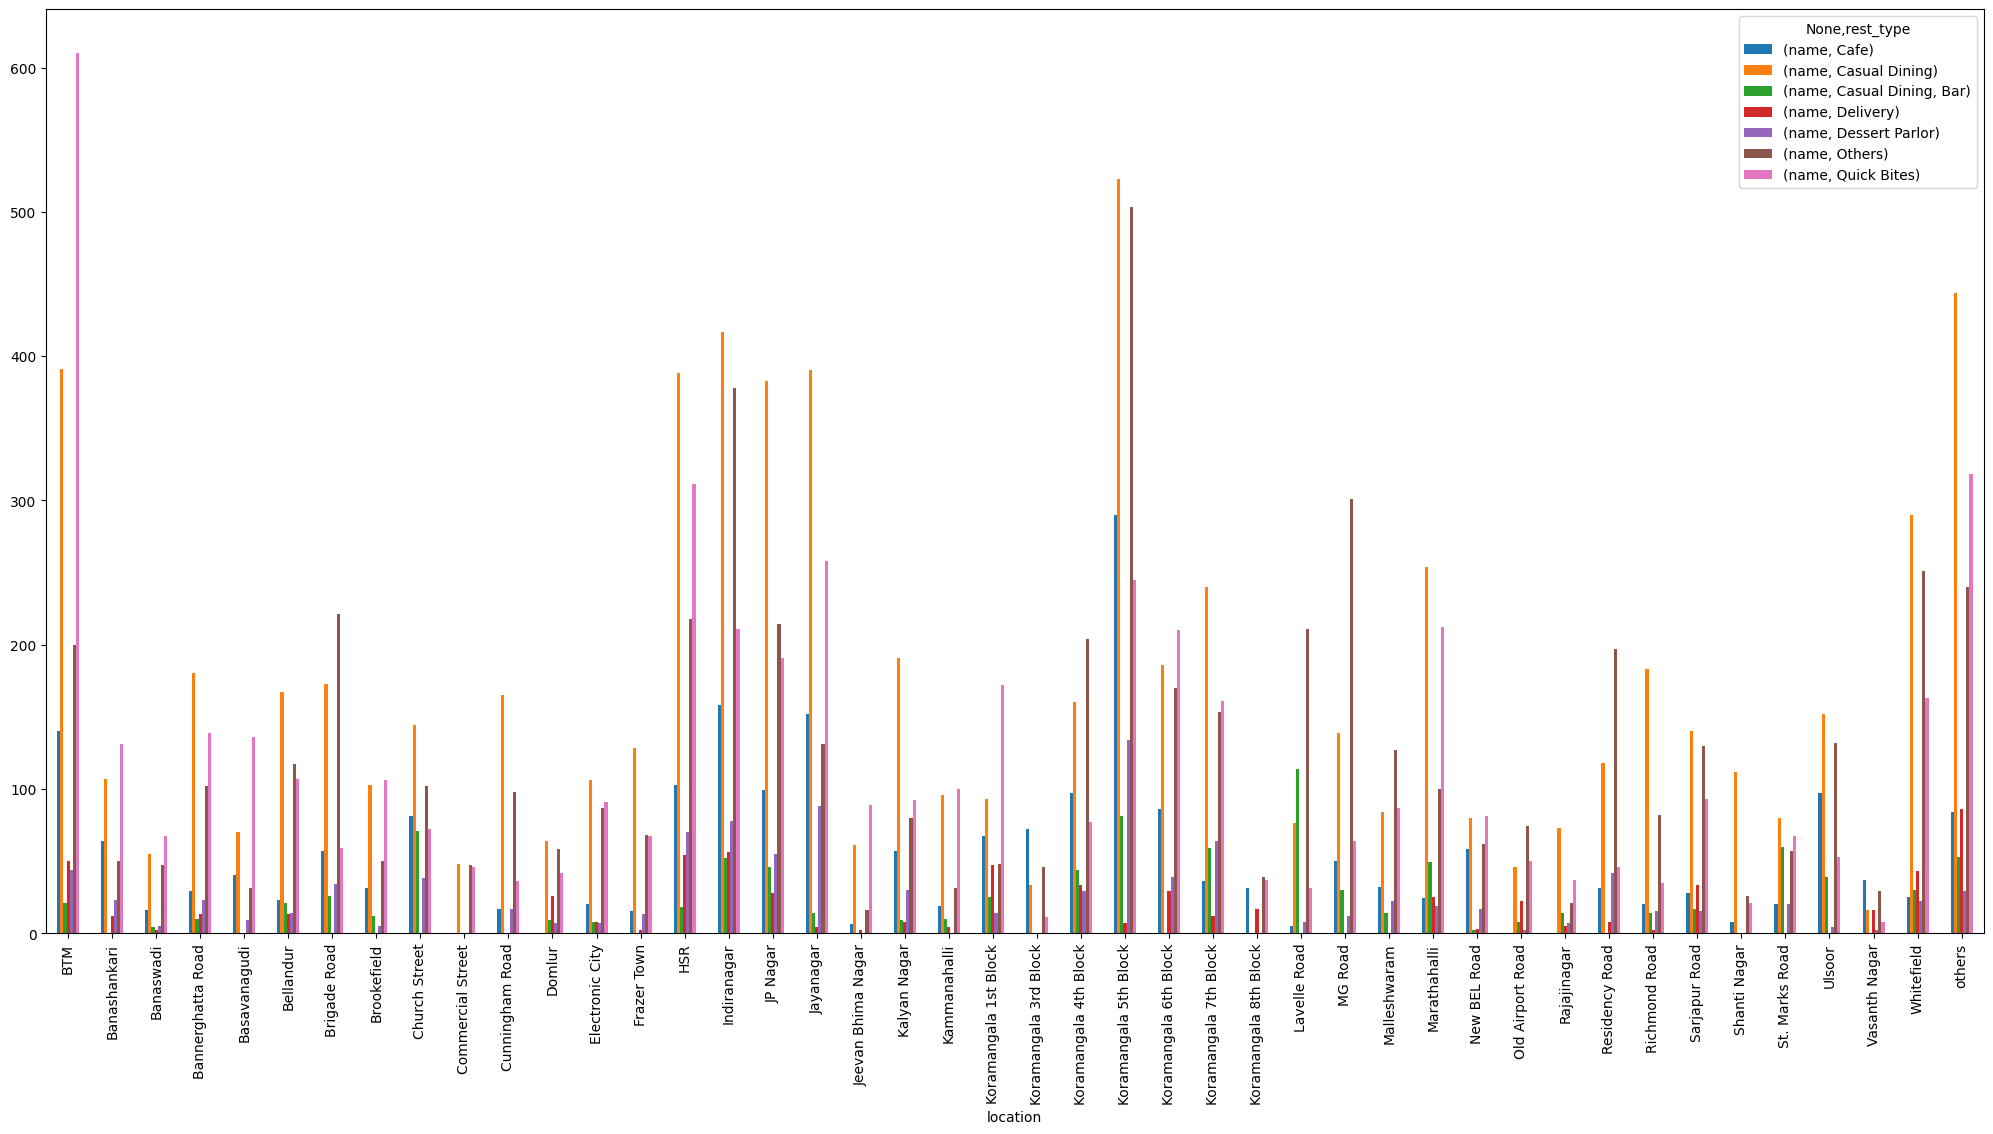

In [97]:
#bar plot
df4.plot(kind='bar',figsize = (25,12))

# 10 Locationwise Number of Votes given by customers (Voting)

In [98]:
df5=df[['location','votes']]
df5.drop_duplicates()
df6=df5.groupby(df['location'])['votes'].sum()
df6=df6.to_frame()
df6=df6.sort_values('votes',ascending=False)
df6

,votes
location,
Koramangala 5th Block,2197617
Indiranagar,1150323
Koramangala 4th Block,656372
Church Street,593580
JP Nagar,557834
Lavelle Road,504228
Koramangala 7th Block,479196
BTM,473715
HSR,460849


In [99]:
df6.index # X-Axis for the Barplot

Index(['Koramangala 5th Block', 'Indiranagar', 'Koramangala 4th Block',
       'Church Street', 'JP Nagar', 'Lavelle Road', 'Koramangala 7th Block',
       'BTM', 'HSR', 'Jayanagar', 'Koramangala 6th Block', 'Whitefield',
       'Marathahalli', 'Brigade Road', 'MG Road', 'Sarjapur Road', 'others',
       'Residency Road', 'Cunningham Road', 'St. Marks Road',
       'Koramangala 1st Block', 'Malleshwaram', 'Bannerghatta Road',
       'Bellandur', 'New BEL Road', 'Ulsoor', 'Kalyan Nagar', 'Banashankari',
       'Old Airport Road', 'Koramangala 3rd Block', 'Richmond Road',
       'Brookefield', 'Kammanahalli', 'Electronic City', 'Domlur',
       'Frazer Town', 'Basavanagudi', 'Rajajinagar', 'Shanti Nagar',
       'Jeevan Bhima Nagar', 'Vasanth Nagar', 'Banaswadi', 'Commercial Street',
       'Koramangala 8th Block'],
      dtype='object', name='location')

In [100]:
df6.votes # Y-Axis for the Barplot

location
Koramangala 5th Block    2197617
Indiranagar              1150323
Koramangala 4th Block     656372
Church Street             593580
JP Nagar                  557834
Lavelle Road              504228
Koramangala 7th Block     479196
BTM                       473715
HSR                       460849
Jayanagar                 458529
Koramangala 6th Block     450387
Whitefield                442359
Marathahalli              421022
Brigade Road              417099
MG Road                   415381
Sarjapur Road             394663
others                    313696
Residency Road            288549
Cunningham Road           284318
St. Marks Road            265596
Koramangala 1st Block     243024
Malleshwaram              220242
Bannerghatta Road         190726
Bellandur                 188257
New BEL Road              170124
Ulsoor                    169758
Kalyan Nagar              163176
Banashankari              147768
Old Airport Road          134081
Koramangala 3rd Block     124528
R

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Lavelle Road'),
  Text(6, 0, 'Koramangala 7th Block'),
  Text(7, 0, 'BTM'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Jayanagar'),
  Text(10, 0, 'Koramangala 6th Block'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'Brigade Road'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'others'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'New BEL Road'),
  Text(25, 0, 'U

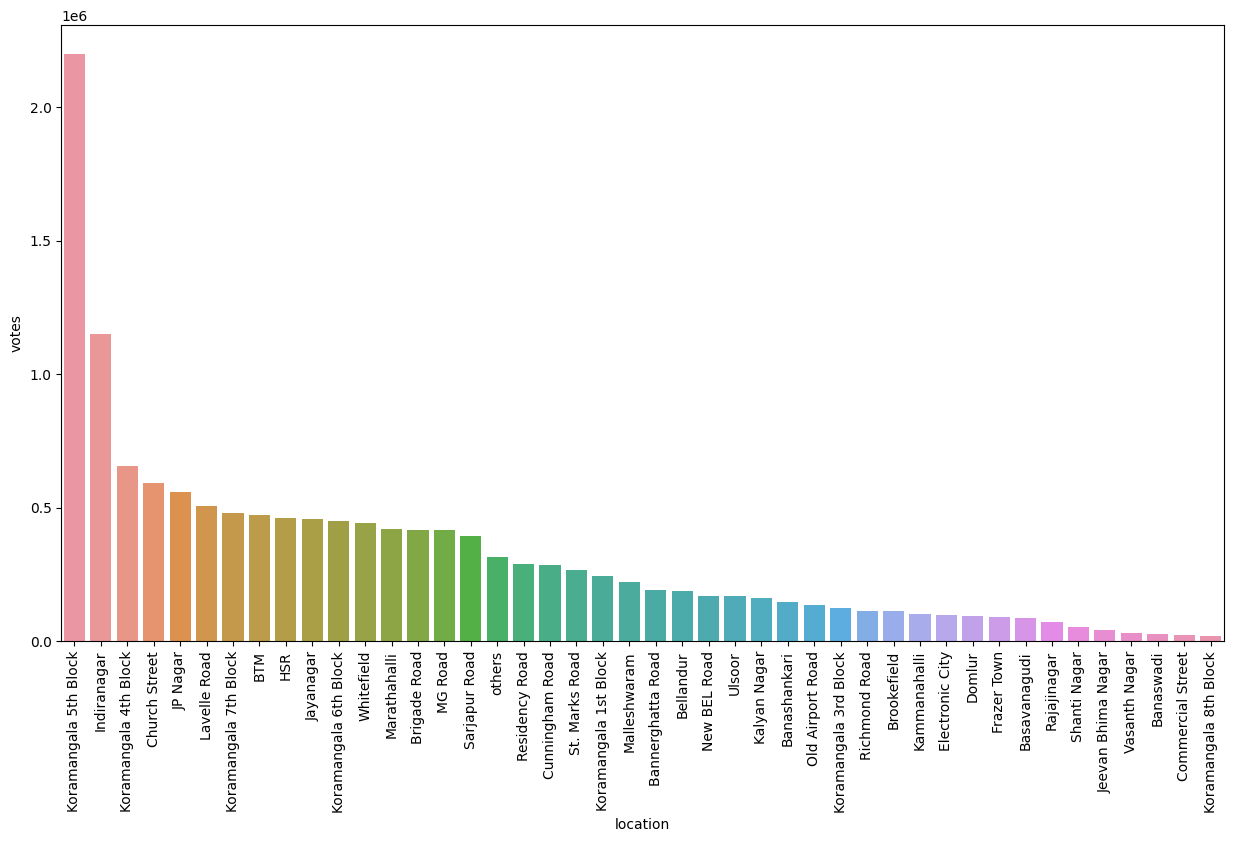

In [101]:
# Barplot
plt.figure(figsize=(15,8))
sns.barplot(x=df6.index, y=df6.votes)
plt.xticks(rotation=90)


Analysis:
People residing in Kormanagala Blocks, Indiranagar, BTM, HSR, etc are always willing to give their feedback or votes to the restaurants in their respective areas. Hence, opening new restaurants here would receive proper timely feedback for improvement. However in areas like Vasant Nagar, Banaswadi, Commercial street may be due to lesser residing population or lesser number of restaurants, the voting given is less.  

# 11) Visulaizing Top Cusines w.r.t. Voting

In [102]:
df7=df[['cuisines','votes']]
df7.drop_duplicates()
df8=df7.groupby(df['cuisines'])['votes'].sum()
df8=df8.to_frame()
df8=df8.sort_values('votes',ascending=False)
df8

,votes
cuisines,
others,12072708
North Indian,487386
"North Indian, Chinese",219244
South Indian,143641
"North Indian, Mughlai",102581
Chinese,98508
"Chinese, Momos",79729
Desserts,72347
Cafe,68555


In [103]:
# remove others Column from the analysis
df8 = df8.iloc[1:, :] #[taking index from 1 till end excluding 0th record]
df8.head()

,votes
cuisines,
North Indian,487386
"North Indian, Chinese",219244
South Indian,143641
"North Indian, Mughlai",102581
Chinese,98508


In [104]:
df8.index # X-axis for the Barplot

Index(['North Indian', 'North Indian, Chinese', 'South Indian',
       'North Indian, Mughlai', 'Chinese', 'Chinese, Momos', 'Desserts',
       'Cafe', 'Cafe, Continental', 'Ice Cream, Desserts',
       'Desserts, Beverages', 'South Indian, North Indian, Chinese',
       'Finger Food', 'Burger, Fast Food', 'Biryani', 'Bakery, Desserts',
       'Pizza, Fast Food', 'Chinese, Thai', 'North Indian, Chinese, Biryani',
       'South Indian, North Indian, Chinese, Street Food',
       'Mithai, Street Food', 'Desserts, Ice Cream', 'Fast Food'],
      dtype='object', name='cuisines')

In [105]:
df8.votes # Y-axis for the Barplot

cuisines
North Indian                                        487386
North Indian, Chinese                               219244
South Indian                                        143641
North Indian, Mughlai                               102581
Chinese                                              98508
Chinese, Momos                                       79729
Desserts                                             72347
Cafe                                                 68555
Cafe, Continental                                    64724
Ice Cream, Desserts                                  62135
Desserts, Beverages                                  50516
South Indian, North Indian, Chinese                  46159
Finger Food                                          44976
Burger, Fast Food                                    44083
Biryani                                              40628
Bakery, Desserts                                     36954
Pizza, Fast Food                               

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Chinese, Momos'),
  Text(6, 0, 'Desserts'),
  Text(7, 0, 'Cafe'),
  Text(8, 0, 'Cafe, Continental'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Desserts, Beverages'),
  Text(11, 0, 'South Indian, North Indian, Chinese'),
  Text(12, 0, 'Finger Food'),
  Text(13, 0, 'Burger, Fast Food'),
  Text(14, 0, 'Biryani'),
  Text(15, 0, 'Bakery, Desserts'),
  Text(16, 0, 'Pizza, Fast Food'),
  Text(17, 0, 'Chinese, Thai'),
  Text(18, 0, 'North Indian, Chinese, Biryani'),
  Text(19, 0, 'South Indian, North Indian, Chinese, Street Food'),
  Text(20, 0, 'Mithai, Street Food'),
  Text(21, 0, 'Desserts, Ice Cream'),
  Text(22, 0, 'Fast Food')])

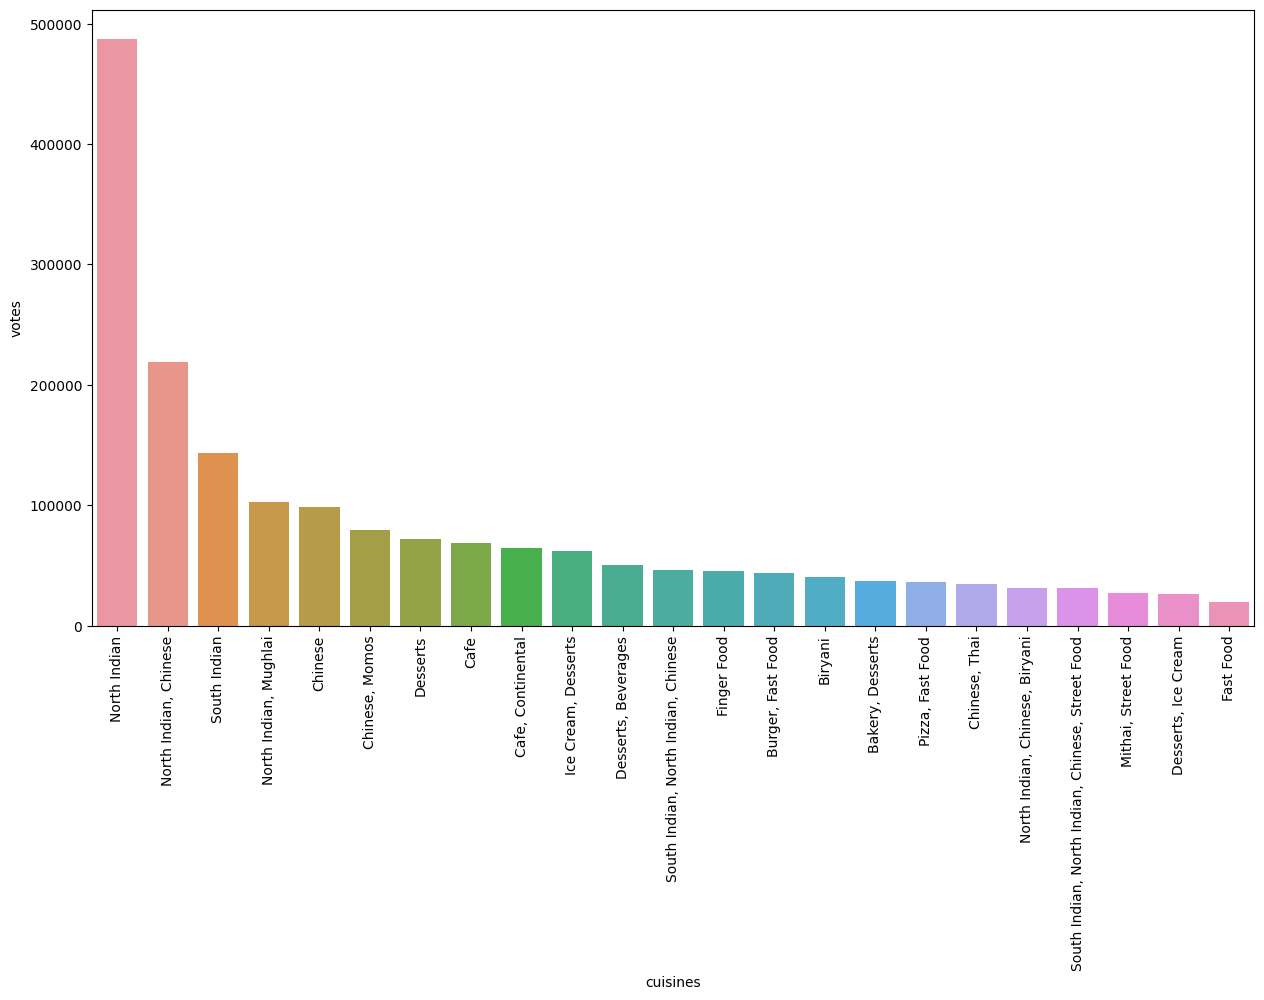

In [106]:
# Barplot
plt.figure(figsize=(15,8))
sns.barplot(x=df8.index, y=df8.votes)
plt.xticks(rotation=90)

Analysis:
The most preferred Cuisines among Bangalore restaurants include North Indian at the highest followed by Chinese and South Indian. One must include these Cuisines in the main menu while planning to open new restaurants.